Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')

#eliminamos columnas vacias
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

#eliminamos columna de status_id que no aporta nada
df.drop(['status_id'], axis=1, inplace=True)

#convertimos la columna status_type en numerica para poder escalarla: video=1, photo=2, link=3, status=4
df['status_type']=df['status_type'].replace({"video": 1, "photo": 2, 'link': 3, 'status': 4})

#convertimos la fecha de formato string a un objeto datetime para despues pasarlo a float
#string
df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')
#float
df['status_published'] = df['status_published'].apply(lambda x: x.timestamp())
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,1.524377e+09,529,512,262,432,92,3,1,1,0
1,2,1.524351e+09,150,0,0,150,0,0,0,0,0
2,1,1.524291e+09,227,236,57,204,21,1,1,0,0
3,2,1.524278e+09,111,0,0,111,0,0,0,0,0
4,2,1.524022e+09,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,2,1.474686e+09,89,0,0,89,0,0,0,0,0
7046,2,1.474630e+09,16,0,0,14,1,0,1,0,0
7047,2,1.474499e+09,2,0,0,1,1,0,0,0,0
7048,2,1.474332e+09,351,12,22,349,2,0,0,0,0


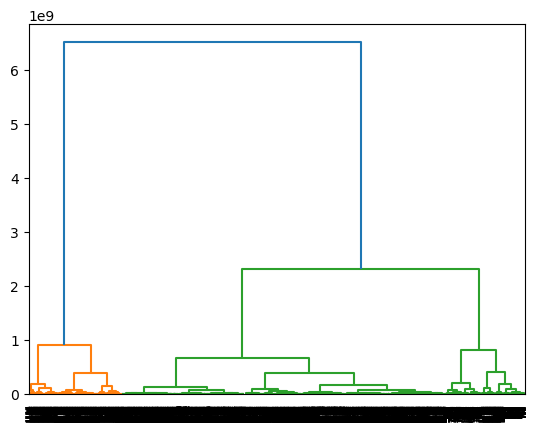

In [3]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [9]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df)
labels = model.labels_
df['Cluster'] = labels

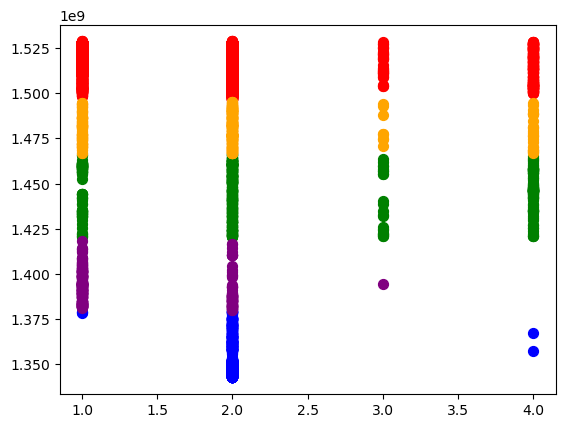

In [8]:
plt.scatter(df[labels==0]["status_type"], df[labels==0]["status_published"], s=50, marker='o', color='red')
plt.scatter(df[labels==1]["status_type"], df[labels==1]["status_published"], s=50, marker='o', color='blue')
plt.scatter(df[labels==2]["status_type"], df[labels==2]["status_published"], s=50, marker='o', color='green')
plt.scatter(df[labels==3]["status_type"], df[labels==3]["status_published"], s=50, marker='o', color='purple')
plt.scatter(df[labels==4]["status_type"], df[labels==4]["status_published"], s=50, marker='o', color='orange')
plt.show()